# Biomedical Engineering Week4 Practice
## Mandelbrot Set

This lab is focused on the Mandelbrot set that was discussed in the lecture. The goal is to produce this image and to understand the algorithm for its generation:  
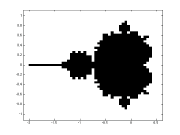

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### (1) The Mandelbrot set emerges from the super simple iteration formula $z_{n+1}={z_n}^2+C$ where $C$ is a constant and one starts from $z_0=0$. Let us assume all numbers are real for the moment. For what values of $C$ does this series diverge? To find out, please write a simple loop the computes $z_n$ up to $n_{max}=50$. Print all $z_n$. If $|z_n|$ exceeds $z_{limit}=50$.0 for any $n$, let us assume the series diverges. For the following $C$ values, determine whether the series diverges or not. (We tried this in class already.)

In [1]:
def mandelbrot(C, n_max=50):
  z = [float('inf') + 0j] * (n_max+1)
  z[0] = 0 + 0j
  for i in range(n_max):
    z[i + 1] = z[i] * z[i] + C
    if(abs(z[i + 1]) == float('inf')):
      break
  #for i in range(n_max):
  #  print(i + 1, z[i + 1])
  if(abs(z[n_max]) == float('inf')):
    #print(f'C={C}, Diverges')
    return 1
  else:
    #print(f'C={C}, Converges')
    return 0

In [4]:
for c in [-4, -2.001, -2, -1.999, -1, 0, 0.5, 1, 2]:
  print(f'{c:6.3f} : {mandelbrot(c)}')

-4.000 : 1
-2.001 : 1
-2.000 : 0
-1.999 : 0
-1.000 : 0
 0.000 : 0
 0.500 : 1
 1.000 : 1
 2.000 : 1


### (2) Now we want to convey in the information in this table in graphical form. Generate a fine grid of $C$ values from –4 to +2 and program a function f(C) that assume 1 or 0 depending on whether the series zn diverging or not. The generate a plot f(C) versus $C$. (You may not need to write a function f(C) as long as the plot is correct. Also this will be a somewhat boring graph but it is just a precursor to what is to come.)

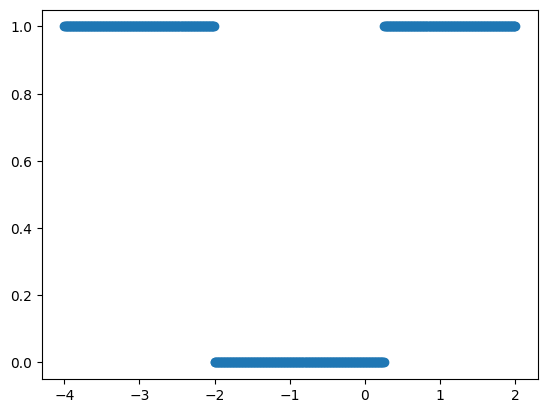

In [9]:
x = [i/100 for i in range(-400, 201)]
y = [mandelbrot(i/100) for i in range(-400, 201)]
plt.scatter(x, y)
plt.show()

### (3) Now make $z$ and $C$ complex variables and repeat step (1). Most likely you will only need to change a single line in your code where define `C` to `C = complex(–0.4,+0.2)`. The complex `abs(z)` function is defined to return $\sqrt{{re}^2+{im}^2}$, and can be conveniently used to compare with zlimit.

In [11]:
for c in [-0.4 + 0.2j, \
           0.4 + 0.6j, \
          -1.7, \
          -1.7 + 0.001j, \
          -1.778, \
          -1.778 + 0.001j, \
          -1.25, \
          -1.25 + 0.04j, \
          -0.125 - 0.9j, \
          -0.125 - 0.85j ]:
  print(f'{c} : {mandelbrot(c)}')

(-0.4+0.2j) : 0
(0.4+0.6j) : 1
-1.7 : 0
(-1.7+0.001j) : 1
-1.778 : 0
(-1.778+0.001j) : 0
-1.25 : 0
(-1.25+0.04j) : 0
(-0.125-0.9j) : 1
(-0.125-0.85j) : 0


### (4)	Finally, we want to calculate the real Mandelbrot set where we change the real and imaginary parts of C=x+y×i using a fine grid of N points in x and y directions ranging from x= –2.0 to +0.5 and y= –1.25 and +1.25.  You may start with N=201. For every point C, start the iteration over zn from z0=0. Define a N×N matrix if fill it with 1 if the series has diverged **within** the first nmax=50 step. Otherwise set the matrix element to 0. Once every matrix element has been filled, use imshow to display it.

<ipython-input-1-763fbe3fc099>:5: RuntimeWarning: overflow encountered in scalar multiply
  z[i + 1] = z[i] * z[i] + C
<ipython-input-1-763fbe3fc099>:5: RuntimeWarning: invalid value encountered in scalar multiply
  z[i + 1] = z[i] * z[i] + C


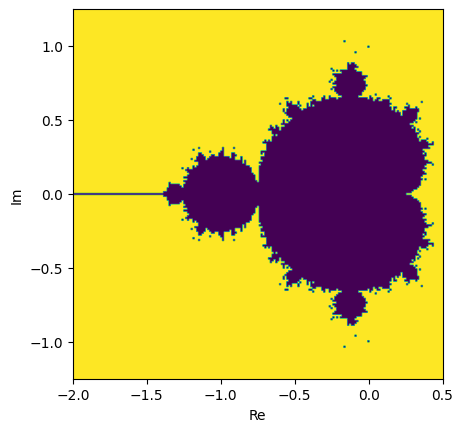

In [17]:
N = 201
(xmin, xmax) = (-2,  0.5)
(ymin, ymax) = (-1.25, 1.25)
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j)

# plt.figure(dpi = 150)
plt.imshow(result, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


### (5)	Now we want to make the colors a bit more appealing. In cases, where the series zn does not diverge, fill the matrix with nmax instead of 0. In cases where it diverges at some iteration n<nmax, fill the matrix with n. Does that look better?


In [22]:
def mandelbrot(C, n_max=50, z_limit=50):
  z = [z_limit] * (n_max+1)
  z[0] = 0 + 0j
  for i in range(n_max):
    z[i + 1] = z[i] * z[i] + C
    if(abs(z[i + 1]) >= z_limit):
      return i
  return n_max

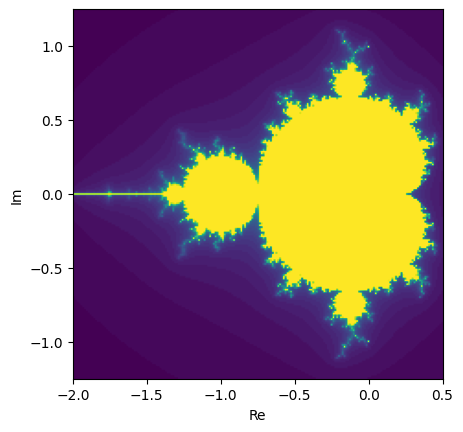

In [23]:
N = 201
(xmin, xmax) = (-2,  0.5)
(ymin, ymax) = (-1.25, 1.25)
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j)

# plt.figure(dpi = 150)
plt.imshow(result, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

### (6)	Zoom into the interval –0.8<x<–0.7 and 0.05<y<0.15 and run the code again. Now increase the number of iterations nmax first to 75 and later to 100. What change do you see in the resulting image?

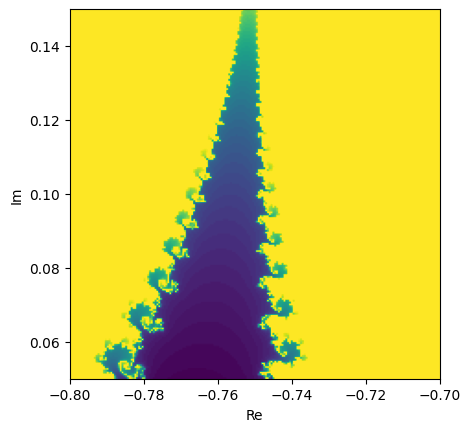

In [24]:
N = 201
(xmin, xmax) = (-0.8,  -0.7)
(ymin, ymax) = (0.05, 0.15)
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j, n_max=75)

# plt.figure(dpi = 150)
plt.imshow(result, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

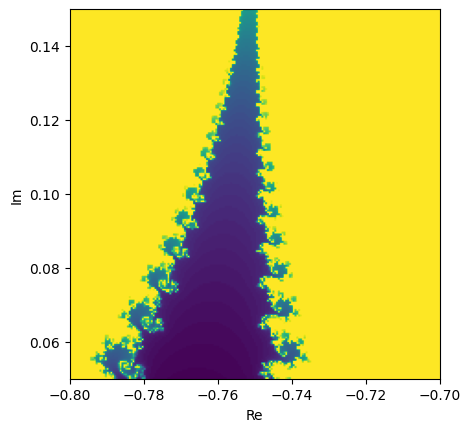

In [25]:
N = 201
(xmin, xmax) = (-0.8,  -0.7)
(ymin, ymax) = (0.05, 0.15)
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j, n_max=100)

# plt.figure(dpi = 150)
plt.imshow(result, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

### (7)	Now zoom in further step by step until the size of the x and y intervals are only 0.001 or less. Adjust nmax as needed. Get lost in the neverworld of fractals. Save the image file and the parameters for the most beautiful image you obtained!

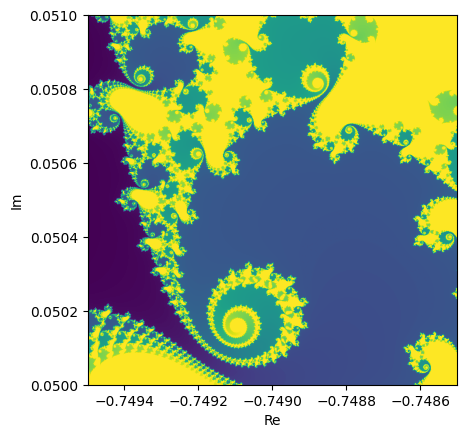

In [27]:

N = 1001
xmin = -0.75+0.0005
xmax = -0.749+0.0005
ymin = 0.05
ymax = 0.051
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 300
z_limit = 50

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j, n_max=300)

# plt.figure(dpi = 150)
plt.imshow(result, extent = [xmin,xmax,ymin,ymax])
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

(8) Finally, run your code with only N=201 grid points and try these magic commands (Replace A by the name of your matrix):
```
%matplotlib osx
# On PCs, try %matplotlib qt
# On a Mac, could also try %matplotlib tk
# You probably need to restart Jupyter after every failed attempt!
plt.rcParams['figure.figsize'] = [5, 5]
from matplotlib import cm
min = A.min()
A -= min
max = A.max()
while (True):
  A = (A + 2) % max;  
  plt.imshow(A,cmap='gist_ncar', interpolation='nearest',animated=True)
  plt.draw()
  plt.pause(0.2)
```

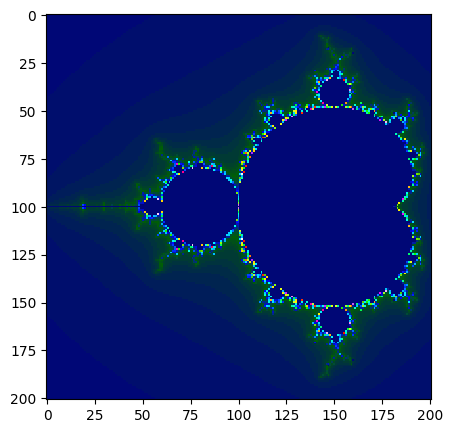

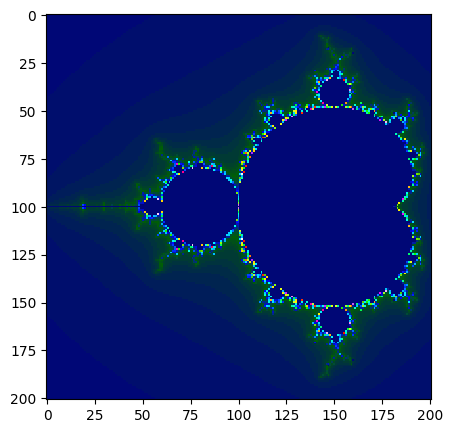

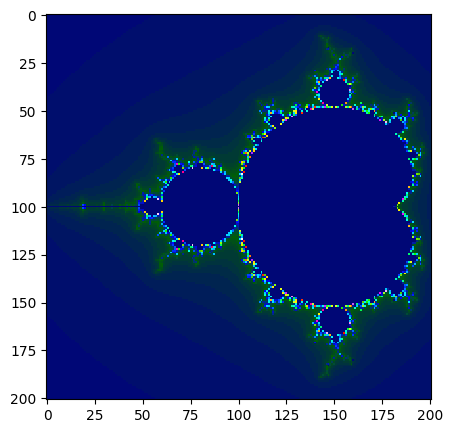

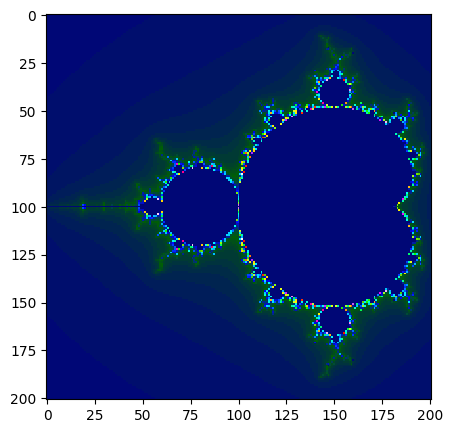

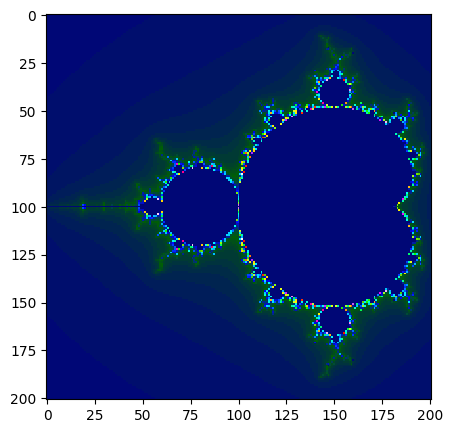

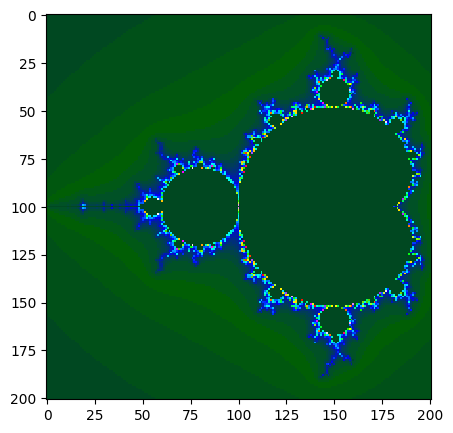

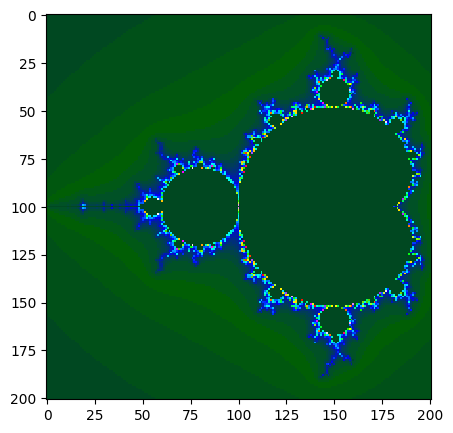

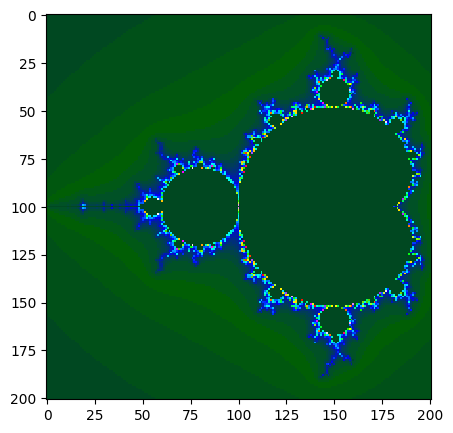

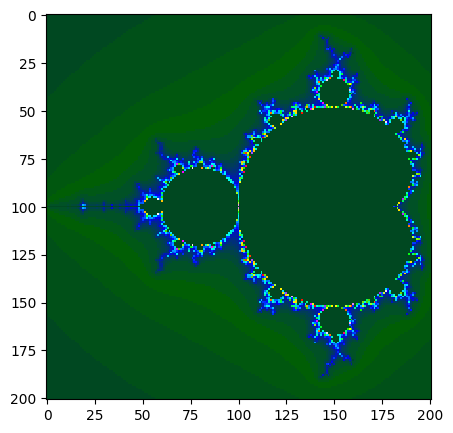

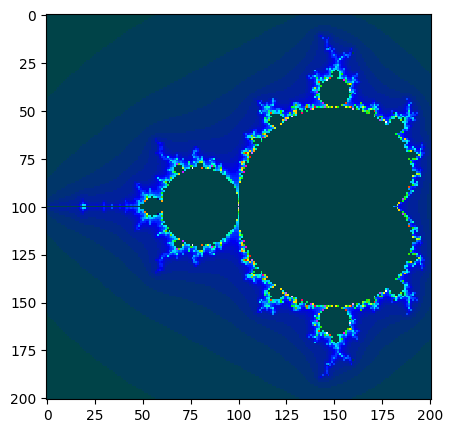

In [28]:

N = 201
xmin = -2
xmax = 0.5
ymin = -1.25
ymax = 1.25
x = np.linspace(xmin, xmax, N)
y = np.linspace(ymin, ymax, N)
result = np.zeros([N,N])
n_max = 50
z_limit = 50

for i in range(N):
    for j in range(N):
        result[j, i] = mandelbrot(x[i] + y[j]*1j, n_max=300)

plt.rcParams['figure.figsize'] = [5, 5]

from matplotlib import cm
min = result.min()
result -= min
max = result.max()
for i in range(10):
    result = (result + 2) % max;
    plt.imshow(result,cmap='gist_ncar', interpolation='nearest',animated=True)
    plt.draw()
    plt.pause(0.2)
